# Effect of Initial Value on Stationary Bandit Problems
In previous notebook, all initial reward estimates were initialized to 0. Here we will initialized them with a value of +5. It will promote exploration. We will see how it effect our results.

We will modify our function so that we can pass initial_value as argument to it

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import __version__ as matplotlib_version

In [2]:
print("numpy version - ", np.__version__)
print("matplotlib version - ", matplotlib_version)

numpy version -  1.17.4
matplotlib version -  3.2.1


In [3]:
import multiprocessing

In [16]:
def rewards_per_step_mp(steps, n_bandit, n_lever,initial_value,
                        testbed, initial_reward_estimates, epsilon,global_reward_list):
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    reward_estimates = np.ones((n_bandit,n_lever)) * initial_value  # _per_pull_per_bandit
    
    print("Initial reward Value : ", str(reward_estimates[0][0]),", epsilon : ", str(epsilon)) # all will be identical
    optimal_choice_per_step = []

    for step in range(0,steps):
        sum_of_optimal_choice = 0
        
        for problem_index in range(n_bandit):  
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice( maxval_indices ) # Breaking ties randomly
            else :
                 random_choice = np.random.randint(n_lever)
            
            if random_choice == np.argmax(testbed[problem_index]):
                sum_of_optimal_choice += 1 
            
            # Incremental Algorithm
            Rn = np.random.normal(testbed[problem_index][random_choice],1)
            n = action_count[problem_index] [random_choice]
            Qn = reward_estimates[problem_index][random_choice]
            
            Qnew = ( Rn + (n - 1) * Qn ) / n
            
            reward_estimates[problem_index][random_choice] = Qnew
            action_count[problem_index] [random_choice] = n+1

        optimal_choice_per_step.append((sum_of_optimal_choice/n_bandit)*100)
    global_reward_list.append(optimal_choice_per_step)
    return

In [17]:
# Produce a testbed of 2000 bandit problems
np.random.seed(10)
n_bandit = 2000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
initial_reward_estimates =  np.random.normal(testbed,1)

## Experiment Setup
In this experiment we will compare an Optimistic Greedy ( Q_1 = 5, epsilon = 0) with Realistic , epsilon-greedy( Q_1 = 0, epsilon = 0.1)

Initial reward Value :  5.0 , epsilon :  0
Initial reward Value :  0.0 , epsilon :  0.1


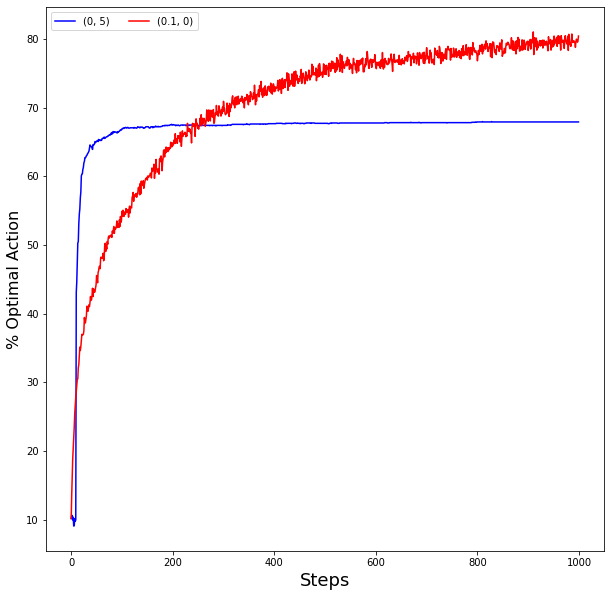

CPU times: user 134 ms, sys: 14.3 ms, total: 148 ms
Wall time: 1min 8s


In [19]:
%%time
with multiprocessing.Manager() as manager:
    global_reward_list = []
    mp_objects = []
   
    epsilon_list      =    [0,   0.1]
    initial_values    =    [5   ,  0]
    color_list        =    ['b' , 'r']
    
    for index,eps in enumerate(epsilon_list):
        global_reward_list.append(manager.list())
        mp_objects.append(multiprocessing.Process(target=rewards_per_step_mp,
                                                  args=(steps, n_bandit, n_lever, initial_values[index],
                                                        testbed, initial_reward_estimates,
                                                        eps, global_reward_list[len(global_reward_list)-1])) )
    for index in range(len(mp_objects)):
        mp_objects[index].start()

    for index in range(len(mp_objects)):
        mp_objects[index].join()
    
    plt.figure(figsize=(10,10))
    plt.xlabel('Steps', fontsize=18)
    plt.ylabel('% Optimal Action', fontsize=16)
    for  index in range(len(mp_objects)):
        plt.plot(np.arange(steps),global_reward_list[index][0],label=(epsilon_list[index],initial_values[index]), color=color_list[index])
    
    plt.legend(loc=2, ncol=2)
    
    plt.show()

## Experiment Setup
### Seting 1 : initial_values = 0
### Seting 2 : initial_values = 5
with epsion = 0.1

Initial reward Value :  0.0 , epsilon :  0.01
Initial reward Value :  5.0 , epsilon :  0.01


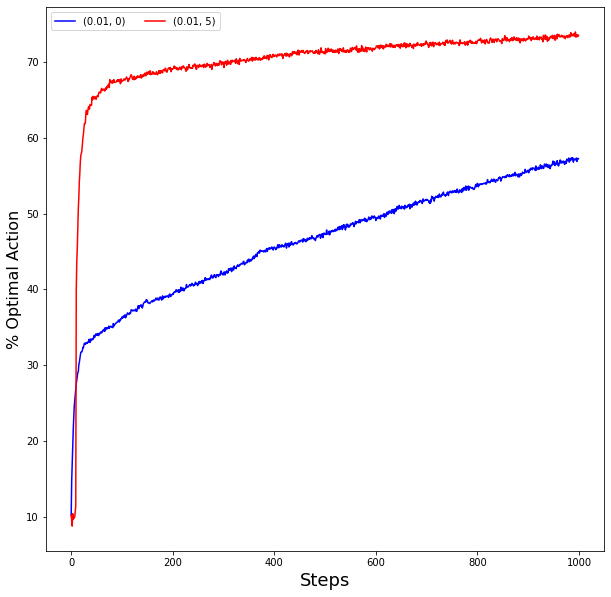

CPU times: user 137 ms, sys: 20.2 ms, total: 158 ms
Wall time: 1min 8s


In [18]:
%%time
with multiprocessing.Manager() as manager:
    global_reward_list = []
    mp_objects = []
    initial_values    =    [0   ,   5]
    epsilon_list  =    [0.01, 0.01]
    color_list        =    ['b', 'r']
    
    for index,eps in enumerate(epsilon_list):
        global_reward_list.append(manager.list())
        mp_objects.append(multiprocessing.Process(target=rewards_per_step_mp,
                                                  args=(steps, n_bandit, n_lever, initial_values[index],
                                                        testbed, initial_reward_estimates,
                                                        eps, global_reward_list[len(global_reward_list)-1])) )
    for index in range(len(mp_objects)):
        mp_objects[index].start()

    for index in range(len(mp_objects)):
        mp_objects[index].join()
    
    plt.figure(figsize=(10,10))
    plt.xlabel('Steps', fontsize=18)
    plt.ylabel('% Optimal Action', fontsize=16)
    for  index in range(len(mp_objects)):
        plt.plot(np.arange(steps),global_reward_list[index][0],label=(epsilon_list[index],initial_values[index]), color=color_list[index])
    
    plt.legend(loc=2, ncol=2)
    
    plt.show()

## Experiment Setup
With four randomly chosen initial values and a fix epsilon value = 0.01.

Initial reward Value :  0.0 , epsilon :  0.01
Initial reward Value :  5.0 , epsilon :  0.01
Initial reward Value :  -5.0 , epsilon :  0.01
Initial reward Value :  10.0 , epsilon :  0.01


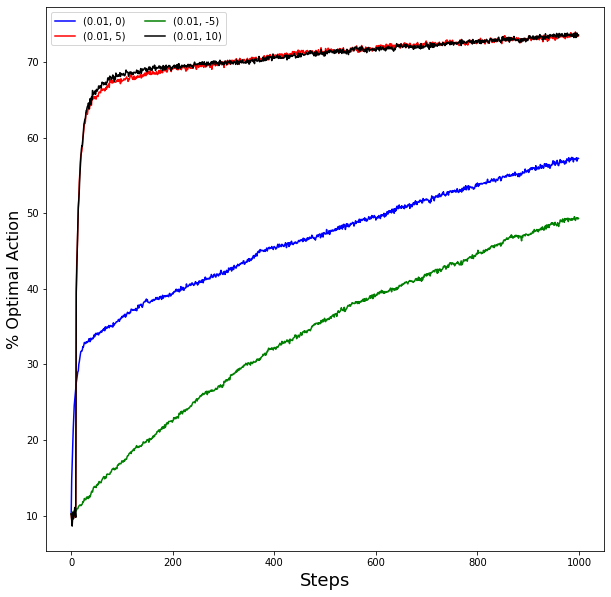

CPU times: user 144 ms, sys: 14.4 ms, total: 158 ms
Wall time: 1min 15s


In [20]:
%%time
with multiprocessing.Manager() as manager:
    global_reward_list = []
    mp_objects = []
    initial_values    =    [0   ,   5,    -5,    10]
    epsilon_list   =    [0.01, 0.01,   0.01,   0.01]
    color_list        =    ['b', 'r',     'g',     'k']
    
    for index,eps in enumerate(epsilon_list):
        global_reward_list.append(manager.list())
        mp_objects.append(multiprocessing.Process(target=rewards_per_step_mp,
                                                  args=(steps, n_bandit, n_lever, initial_values[index],
                                                        testbed, initial_reward_estimates,
                                                        eps, global_reward_list[len(global_reward_list)-1])) )
    for index in range(len(mp_objects)):
        mp_objects[index].start()

    for index in range(len(mp_objects)):
        mp_objects[index].join()
    
    plt.figure(figsize=(10,10))
    plt.xlabel('Steps', fontsize=18)
    plt.ylabel('% Optimal Action', fontsize=16)
    for  index in range(len(mp_objects)):
        plt.plot(np.arange(steps),global_reward_list[index][0],label=(epsilon_list[index],initial_values[index]), color=color_list[index])
    
    plt.legend(loc=2, ncol=2)
    
    plt.show()

As we can see Optimistic-Greedy methods beat epsilon-greedy 